# Temperature and Salinity at Depth Levels

`mom6_tools.MOM6grid` returns an object with MOM6 grid data.

`mom6_tools.???` has a collection of tools used to perform spatial analysis  (e.g., time averages and spatial mean).

The goal of this notebook is the following:

1) serve as an example of how to post-process CESM/MOM6 output;

2) create time averages of T/S fields;

4) compare model results vs. observations (PHC2);

/glade/p/cesm/omwg/obs_data/phc/PHC2_TEMP_tx0.66v1_34lev_ann_avg.nc

/glade/p/cesm/omwg/obs_data/phc/PHC2_SALT_tx0.66v1_34lev_ann_avg.nc

5) compare model results vs. another model results (TODO).

In [23]:
%matplotlib inline
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.latlon_analysis import time_mean_latlon
from mom6_tools.m6toolbox import check_time_interval
from mom6_tools.m6plot import xycompare
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from IPython.display import display, Markdown, Latex
import warnings
warnings.filterwarnings("ignore")

In [28]:
# The following parameters must be set accordingly
######################################################
# case name - must be changed for each configuration
case_name = "g.c2b6.GJRA.TL319_t061.long_JRA_mct.001"
# Path to the run directory
path = "/glade/scratch/gmarques/"+case_name+"/run/"
# name of ocean static file
static = case_name+".mom6.static.nc"
# name of montly mean file in z-space
output = case_name+".mom6.h_*.nc"
# initial conditions file
ic = "MOM_IC.nc"
# initial and final years for computing time mean
year_start = 30
year_end = 64
# Put your name and email address below
author = 'Gustavo Marques (gmarques@ucar.edu)'
######################################################
# create an empty class object
class args:
  pass

args.infile = path+output
args.year_start = year_start
args.year_end = year_end
args.case_name = case_name
args.savefigs = False
args.time_series = True

In [3]:
# load mom6 grid
grd = MOM6grid(path+static)

MOM6 grid successfully loaded... 



In [29]:
# load PHC2 data
phc_temp = xr.open_mfdataset('/glade/p/cesm/omwg/obs_data/phc/PHC2_TEMP_tx0.66v1_34lev_ann_avg.nc', decode_coords=False, decode_times=False)
phc_salt = xr.open_mfdataset('/glade/p/cesm/omwg/obs_data/phc/PHC2_SALT_tx0.66v1_34lev_ann_avg.nc', decode_coords=False, decode_times=False)

In [30]:
# load model output
out_nc = xr.open_mfdataset(args.infile, decode_coords=False, decode_times=False)
# time in years
out_nc['time'] = out_nc.time/365.

In [31]:
# check if data includes years between ti and tf
ti = args.year_start
tf = args.year_end
check_time_interval(ti,tf,out_nc)

In [32]:
# time averages
temp = np.ma.masked_invalid(out_nc['temp'].sel(time=slice(ti,tf)).mean('time').values)
salt = np.ma.masked_invalid(out_nc['salt'].sel(time=slice(ti,tf)).mean('time').values)

### Comparing temperature and salinity averaged between years 30 and 64

### temp at depth level = 2.5m

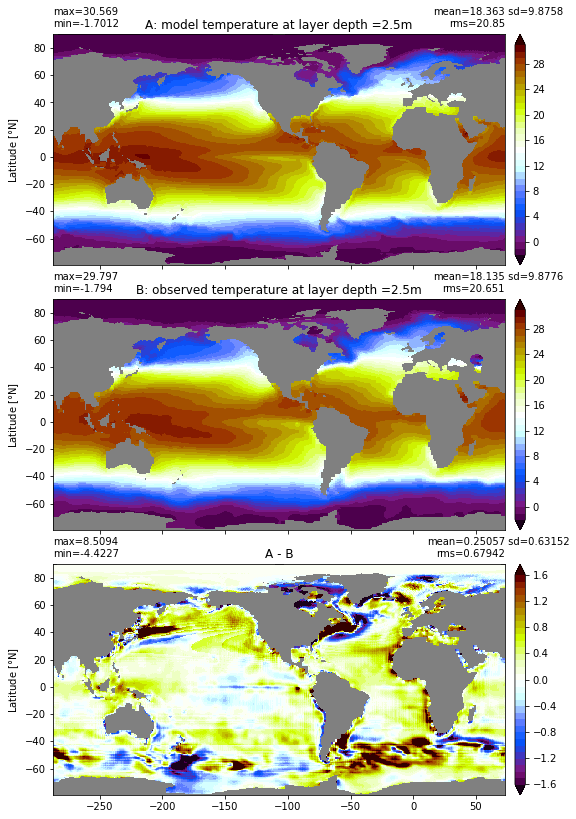

### salt at depth level = 2.5m

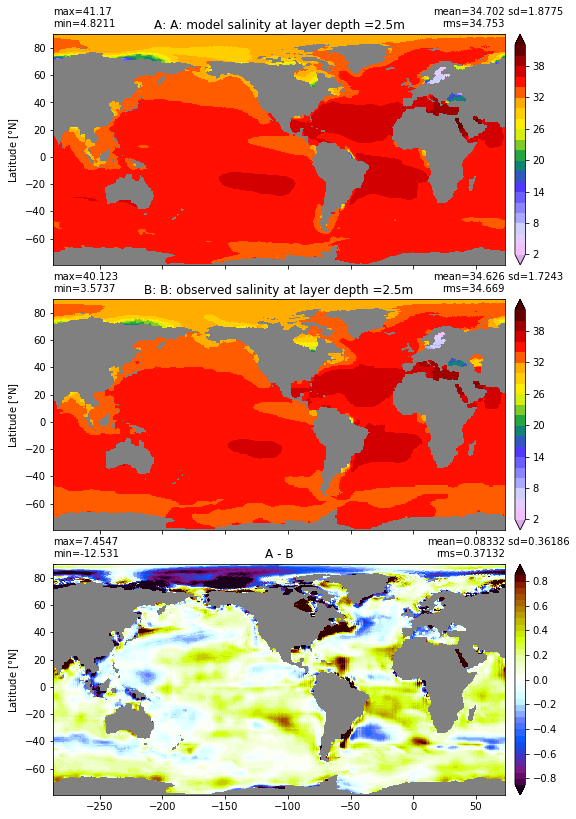

### temp at depth level = 10.0m

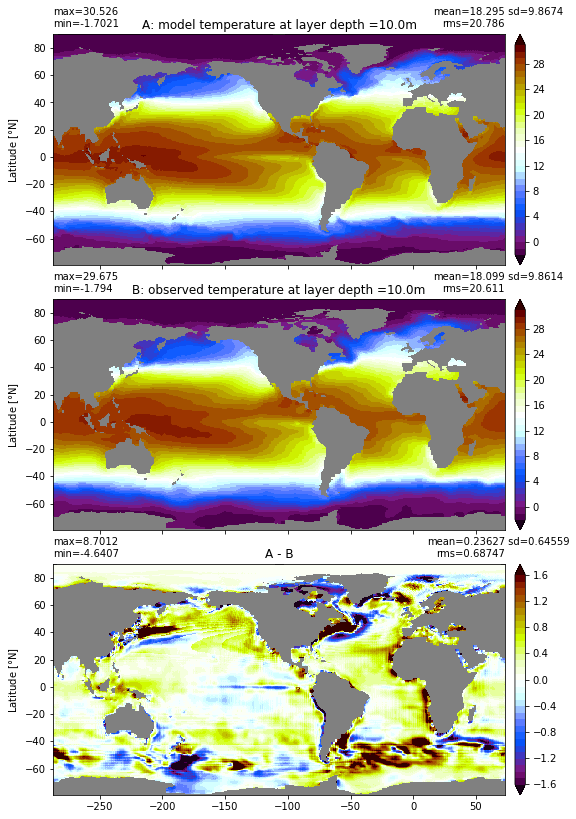

### salt at depth level = 10.0m

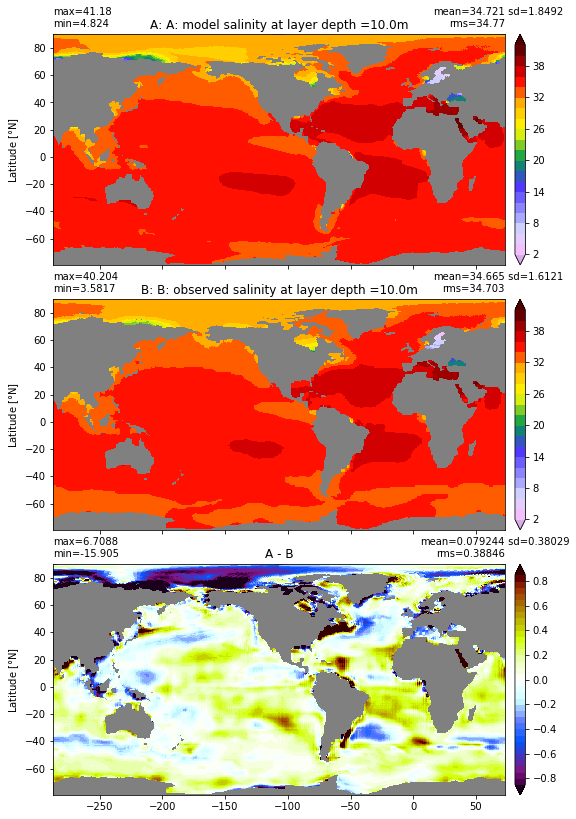

### temp at depth level = 20.0m

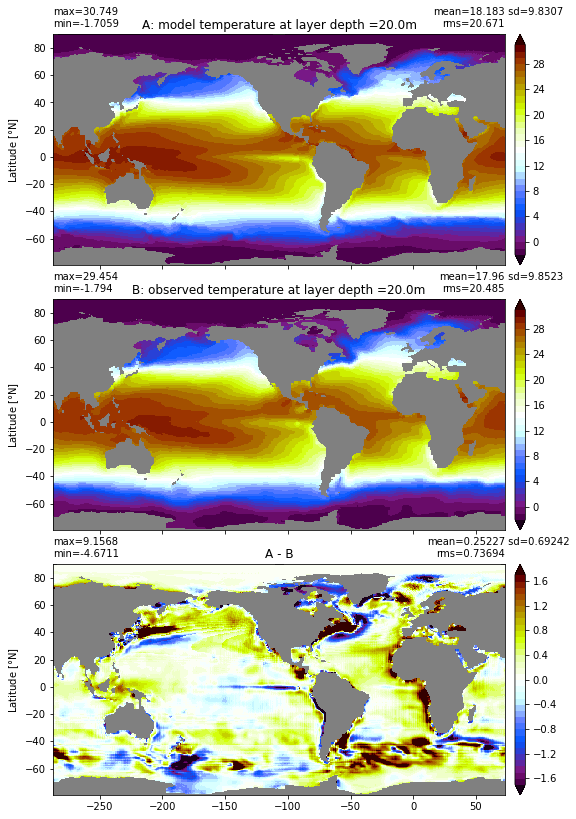

### salt at depth level = 20.0m

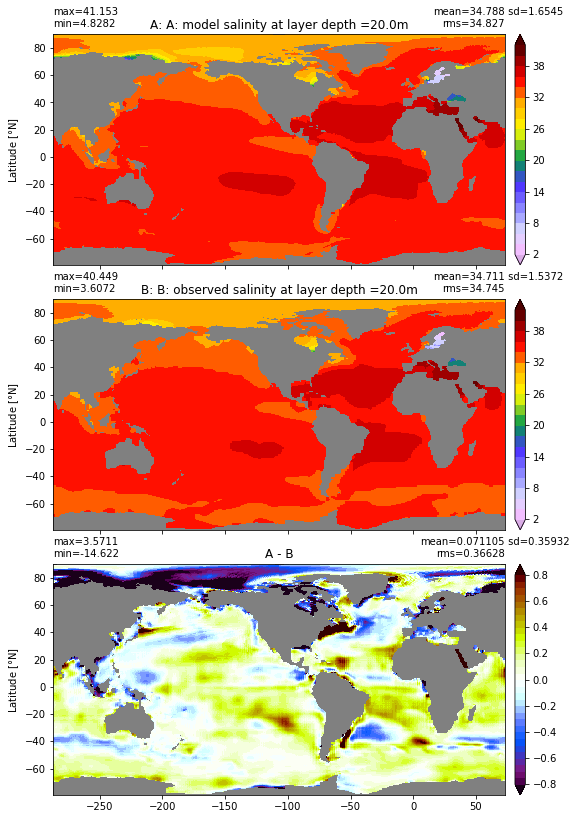

### temp at depth level = 32.5m

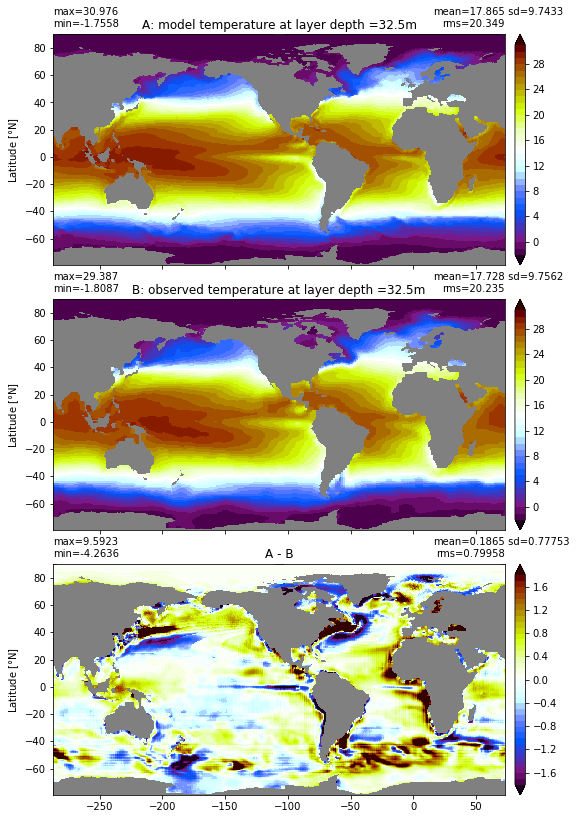

### salt at depth level = 32.5m

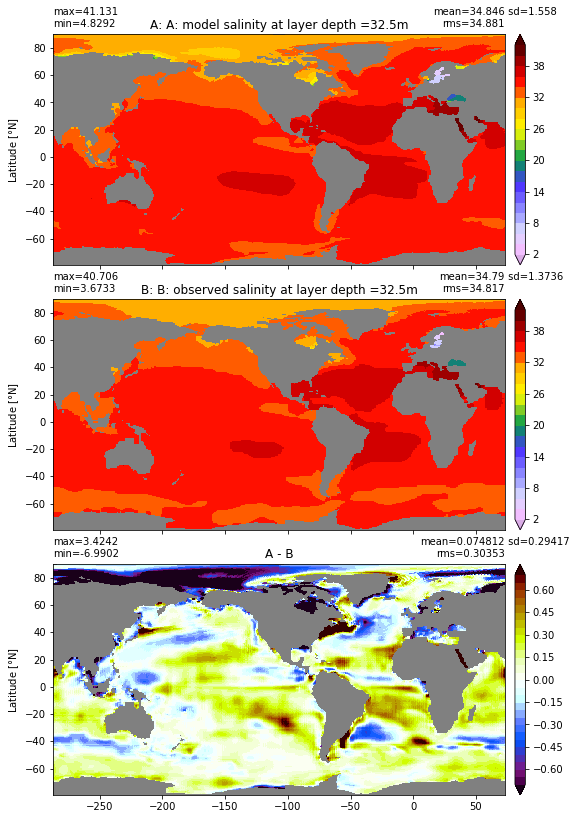

### temp at depth level = 51.25m

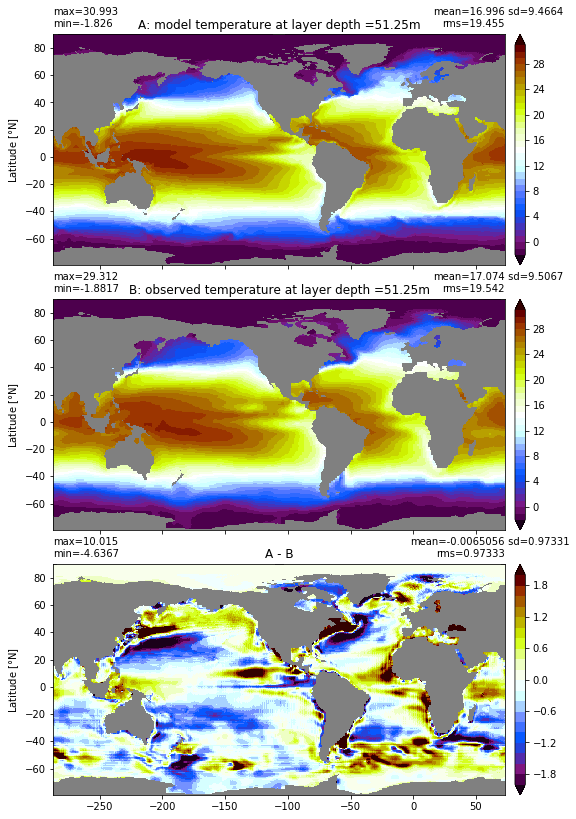

### salt at depth level = 51.25m

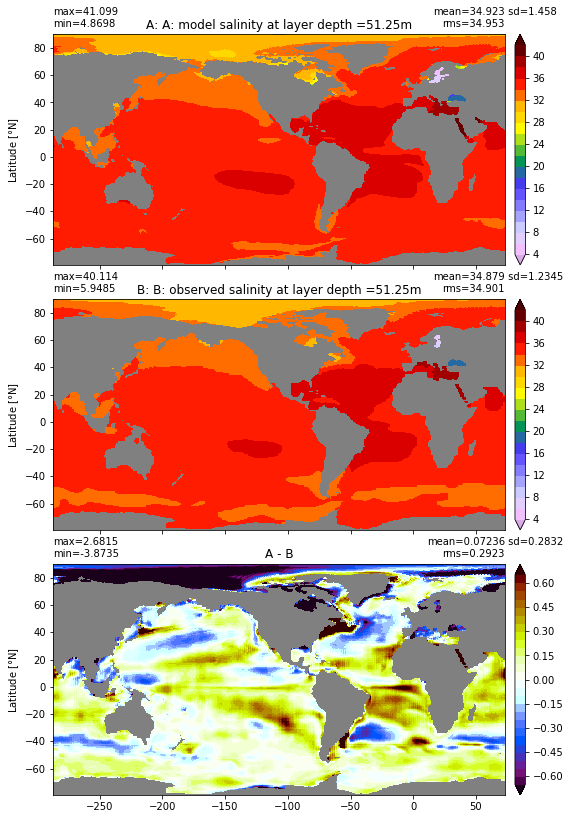

### temp at depth level = 75.0m

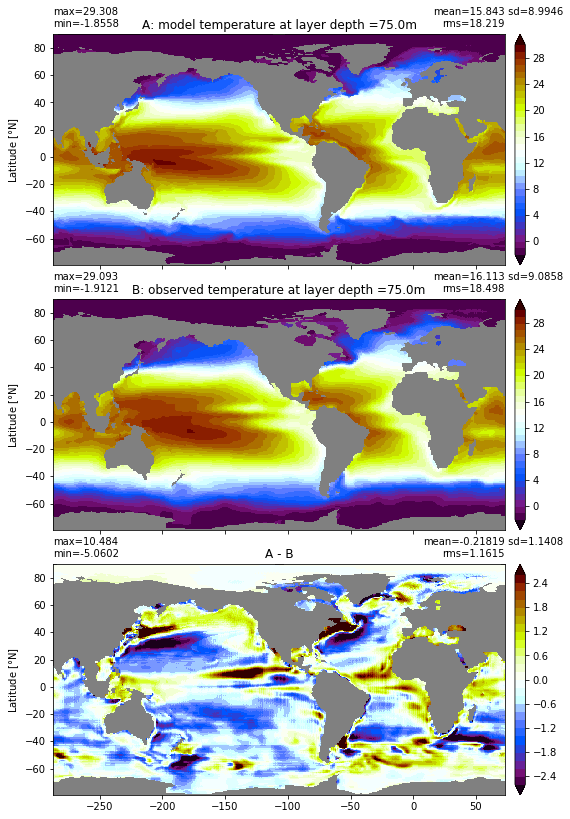

### salt at depth level = 75.0m

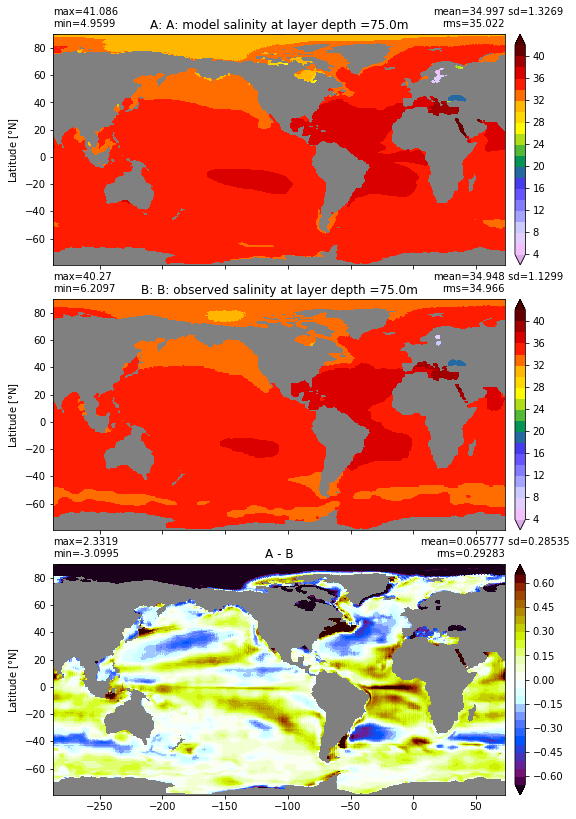

### temp at depth level = 100.0m

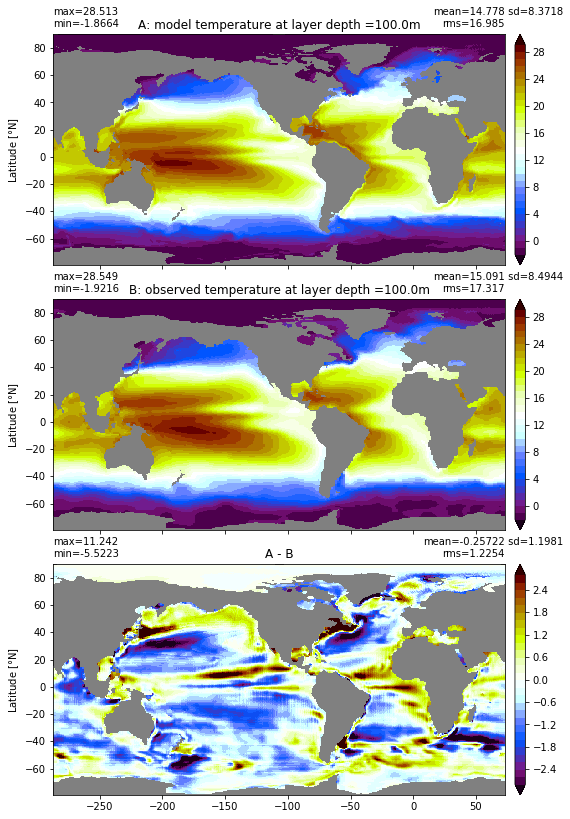

### salt at depth level = 100.0m

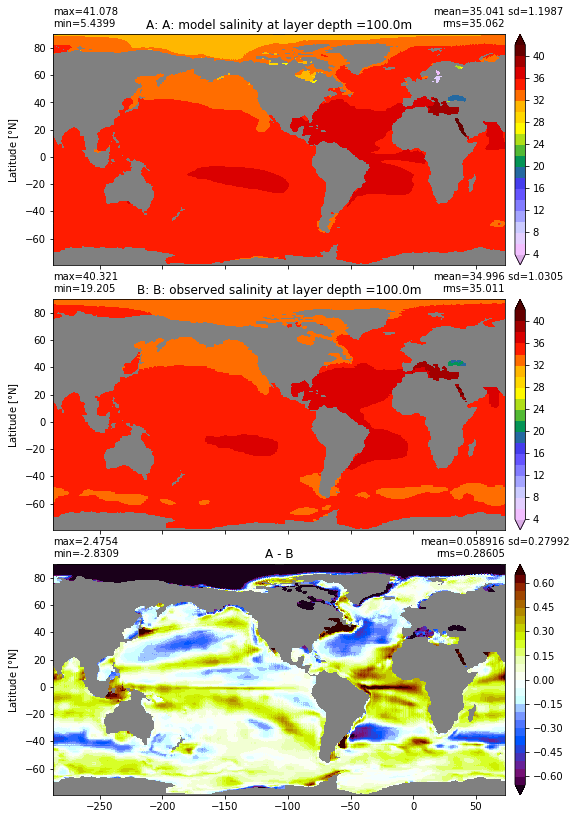

### temp at depth level = 125.0m

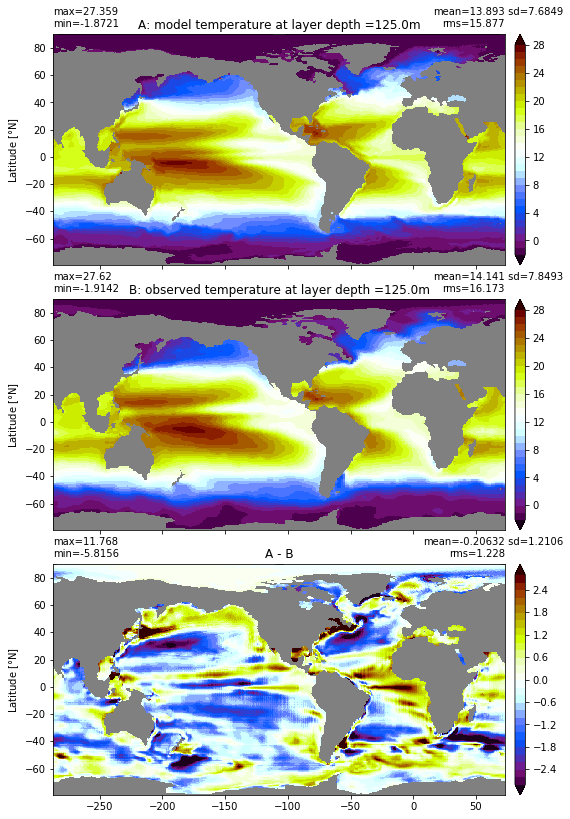

### salt at depth level = 125.0m

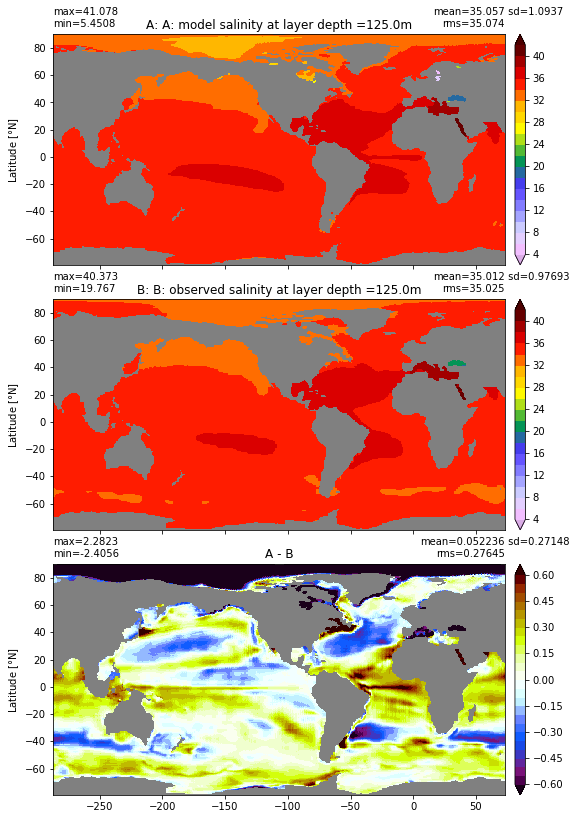

### temp at depth level = 156.25m

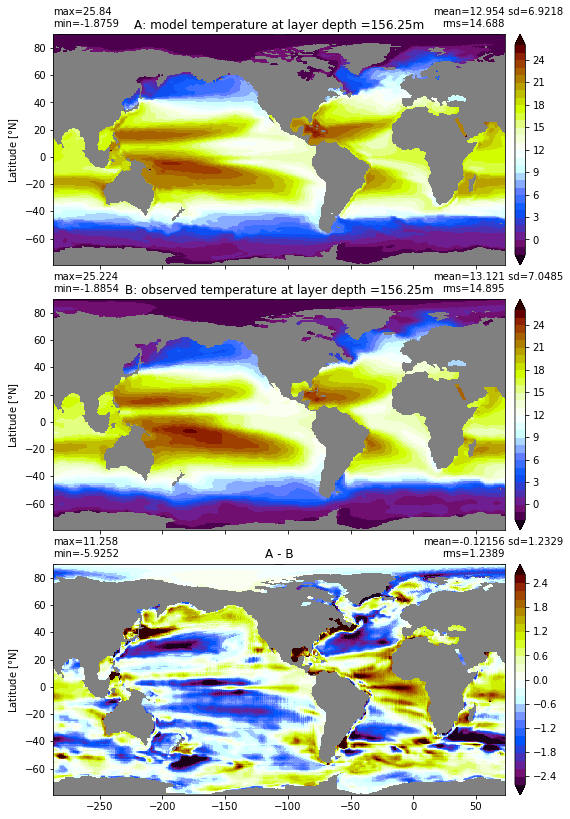

### salt at depth level = 156.25m

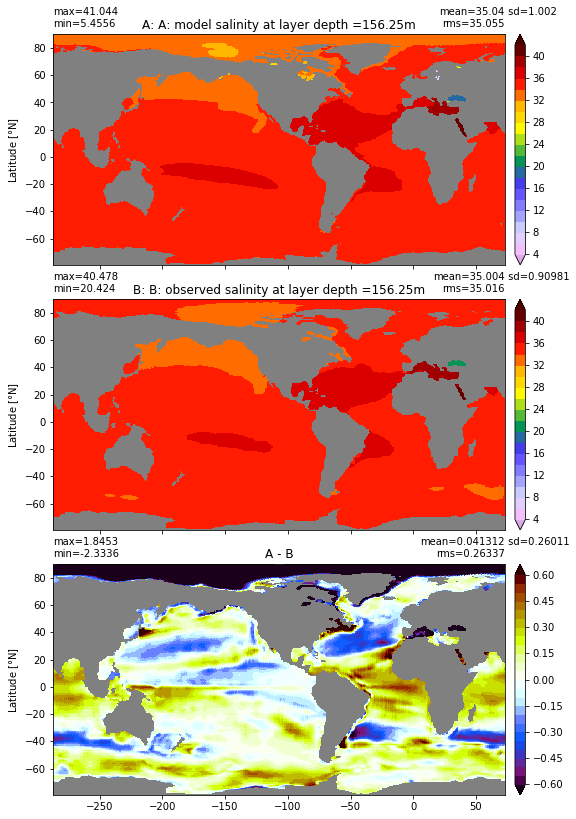

### temp at depth level = 200.0m

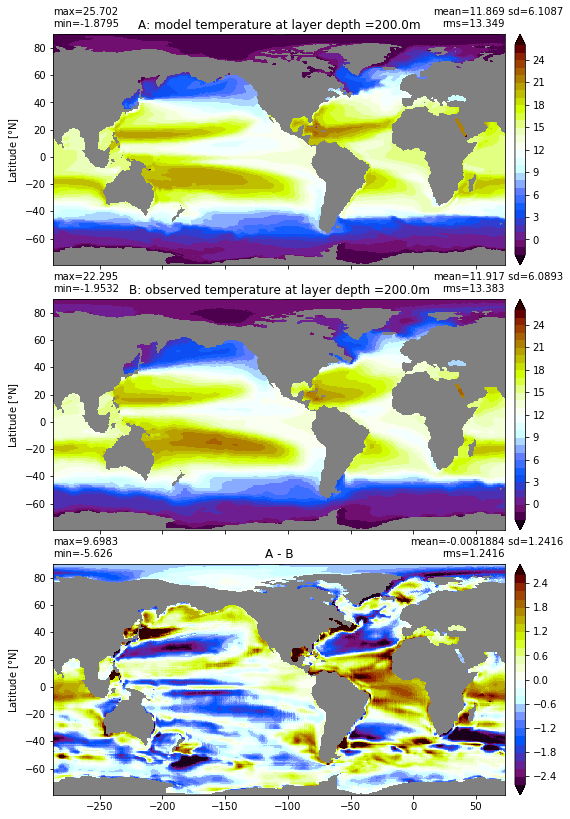

### salt at depth level = 200.0m

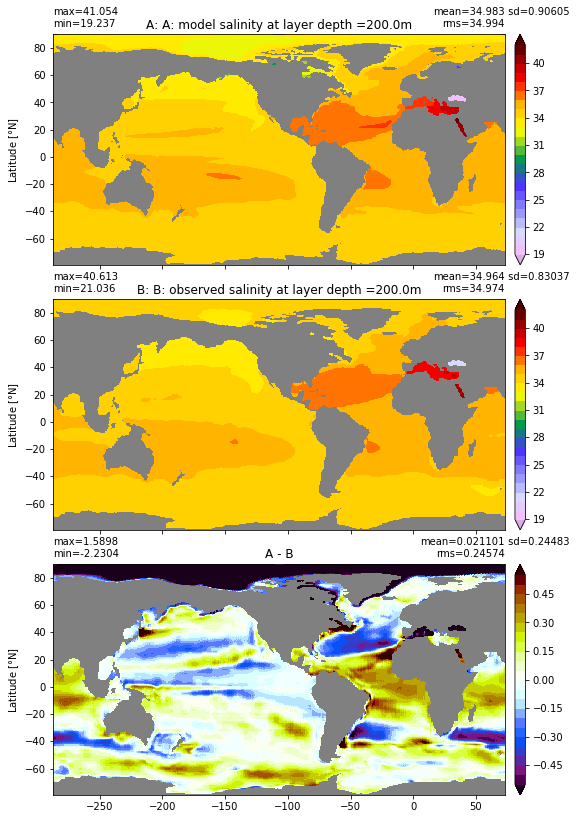

### temp at depth level = 250.0m

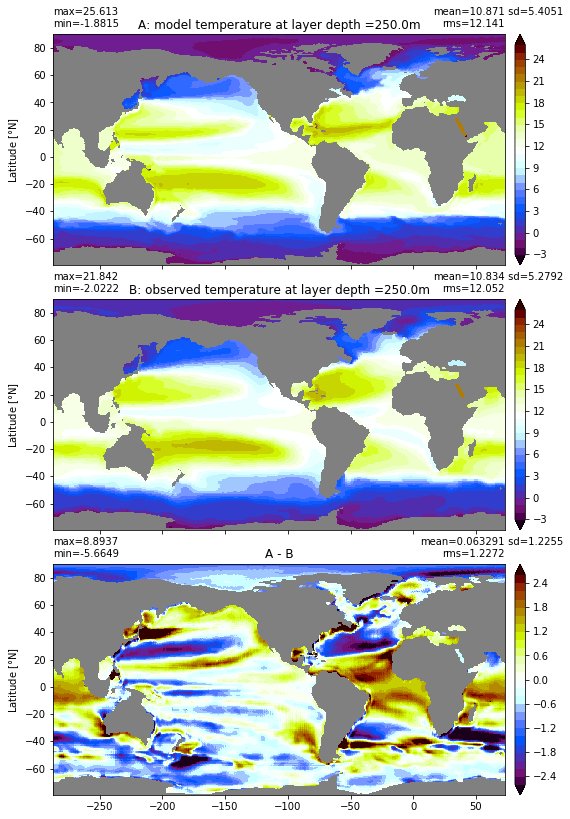

### salt at depth level = 250.0m

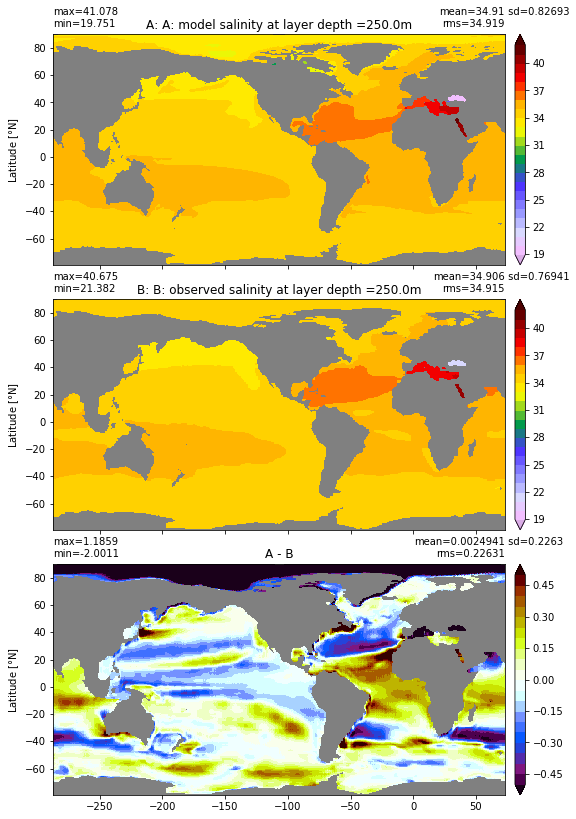

### temp at depth level = 312.5m

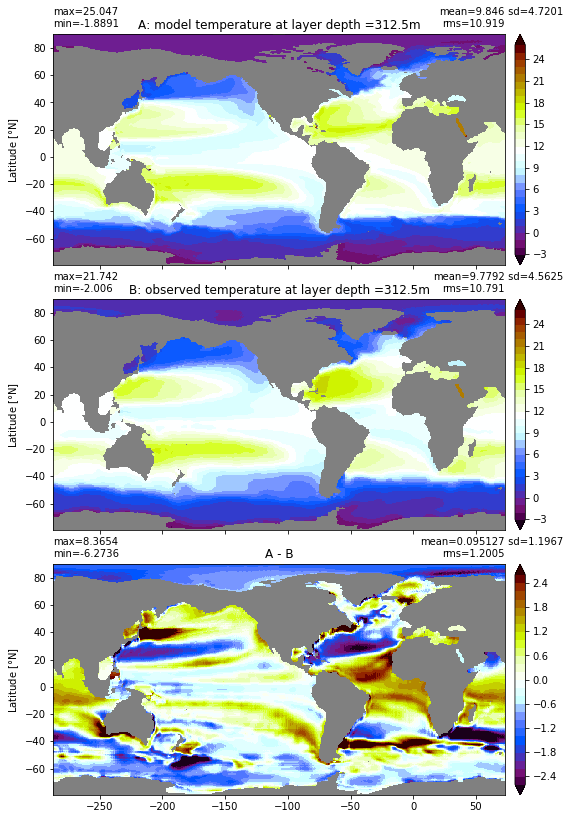

### salt at depth level = 312.5m

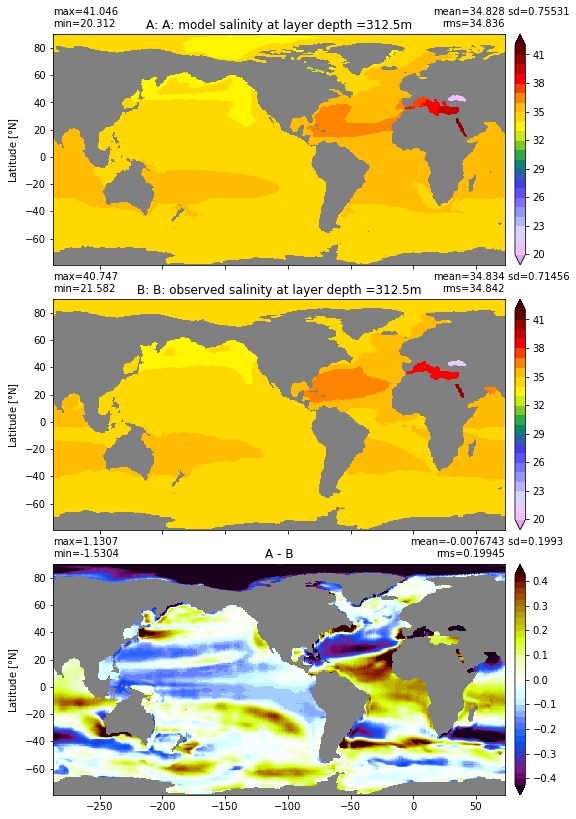

### temp at depth level = 400.0m

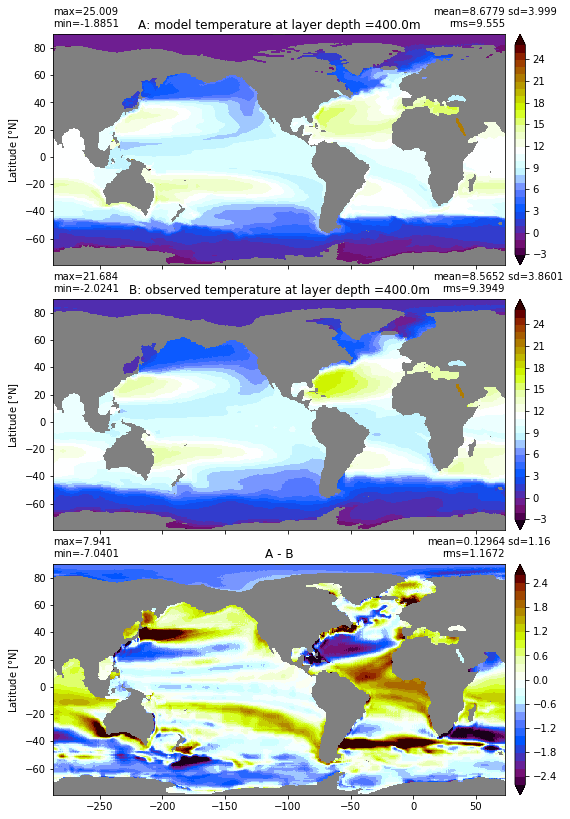

### salt at depth level = 400.0m

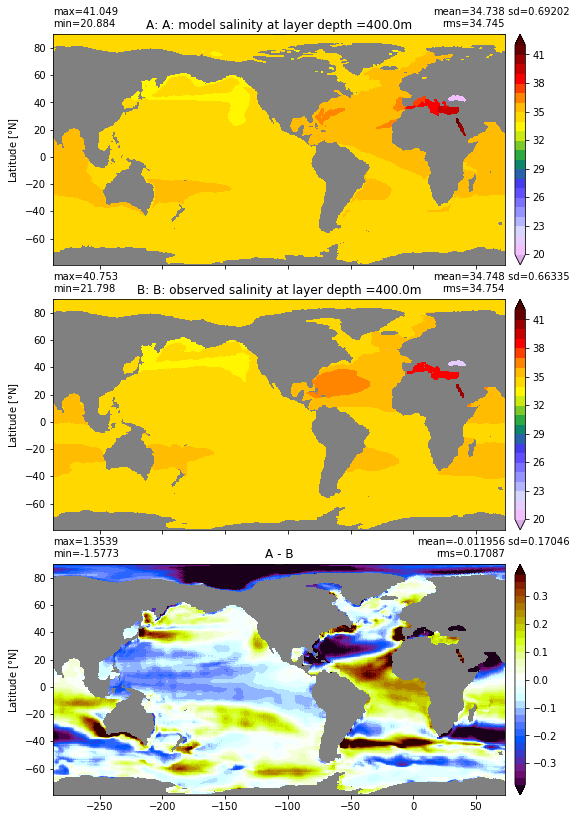

### temp at depth level = 500.0m

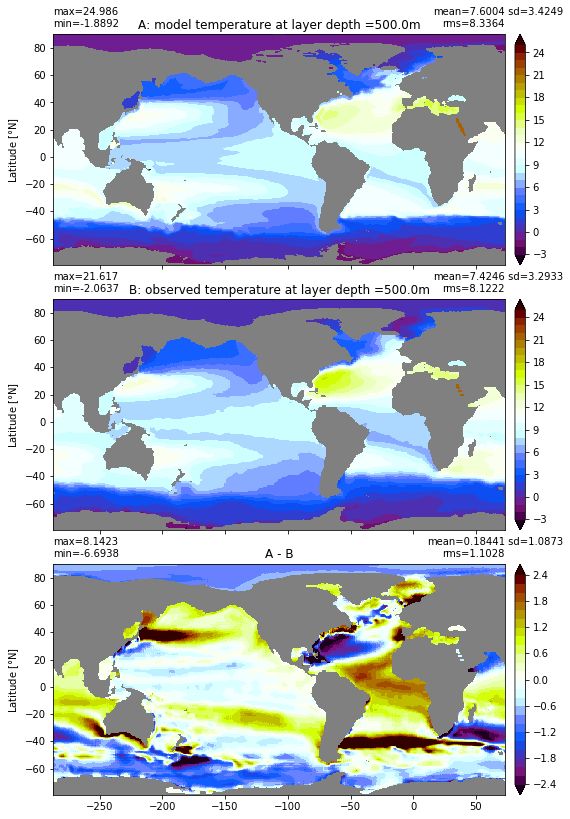

### salt at depth level = 500.0m

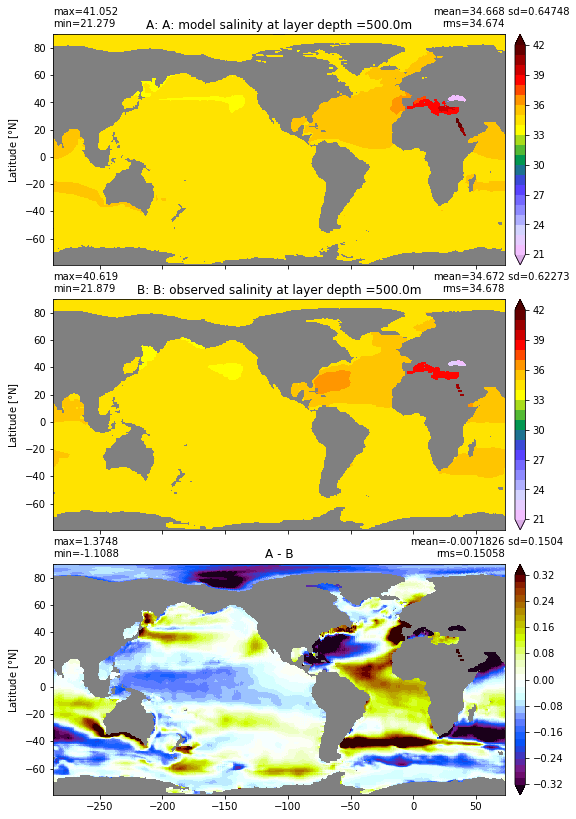

### temp at depth level = 600.0m

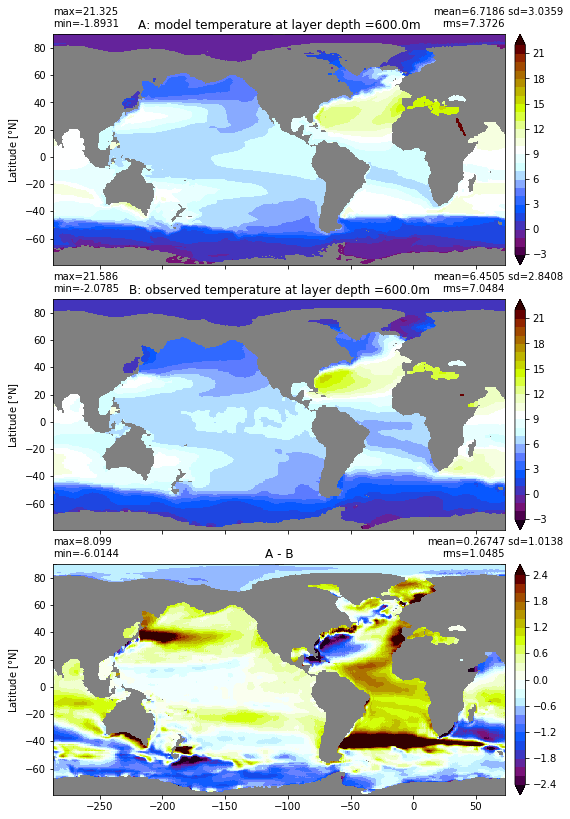

### salt at depth level = 600.0m

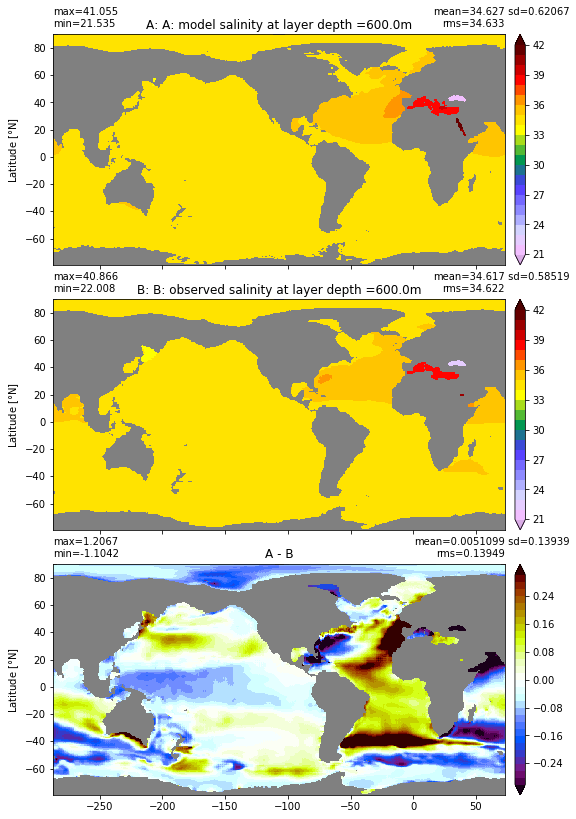

### temp at depth level = 700.0m

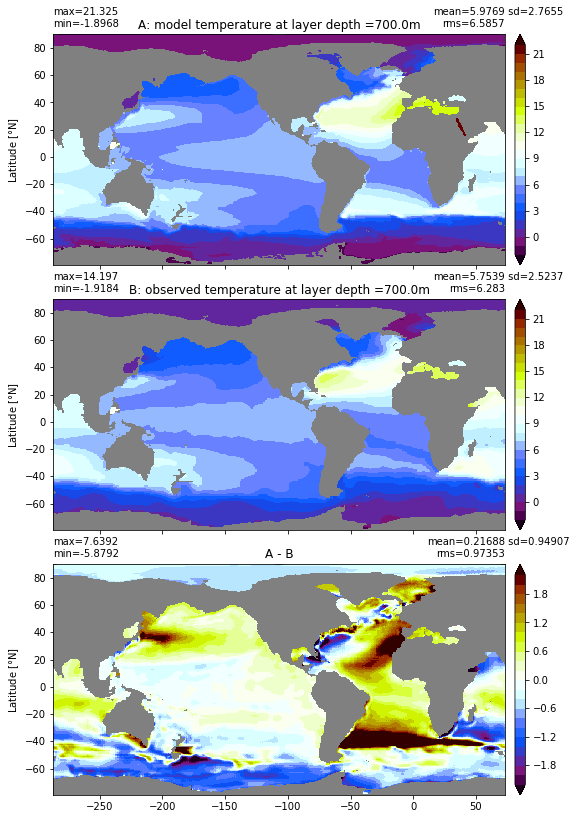

### salt at depth level = 700.0m

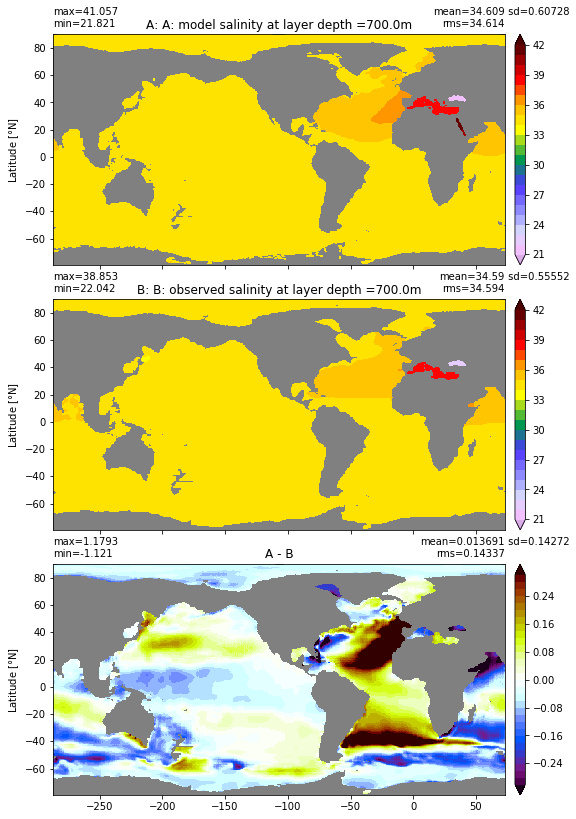

### temp at depth level = 800.0m

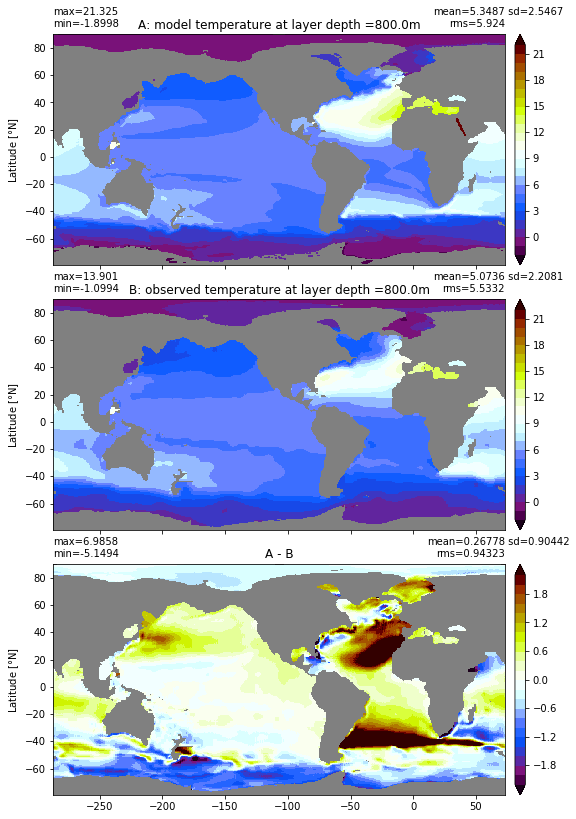

### salt at depth level = 800.0m

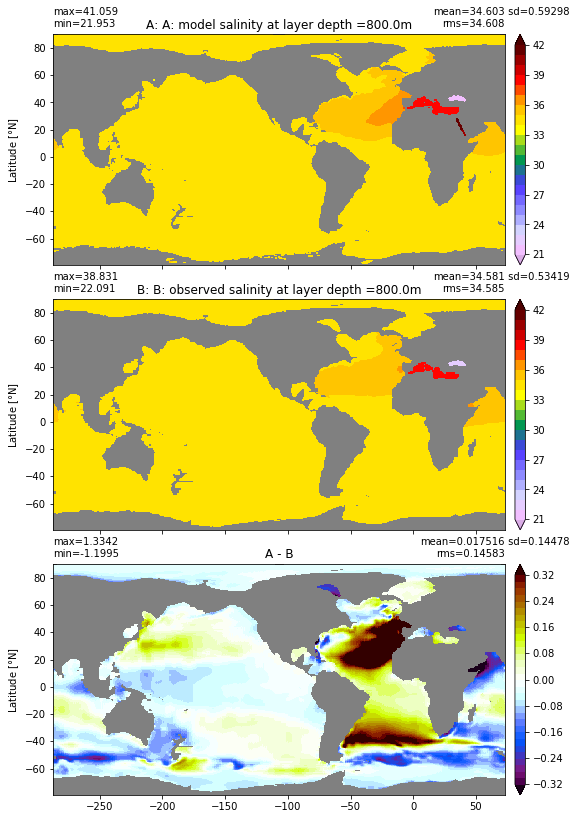

### temp at depth level = 900.0m

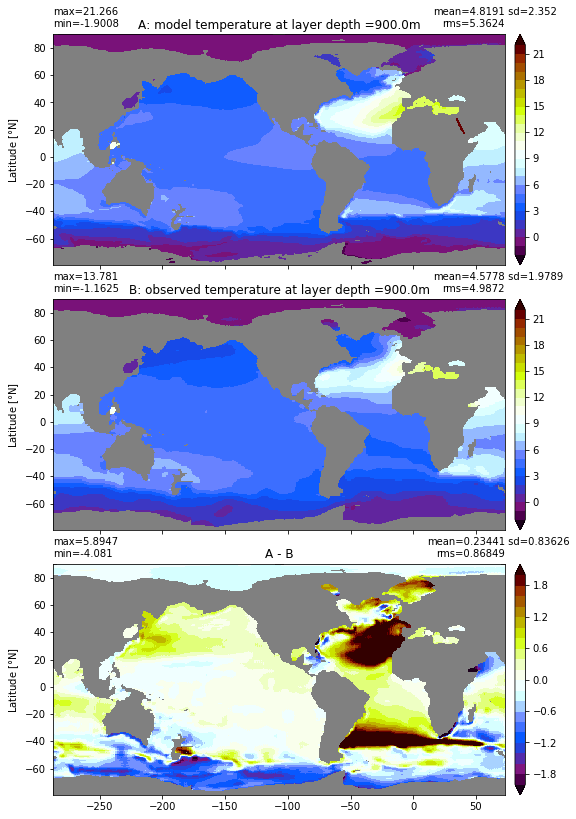

### salt at depth level = 900.0m

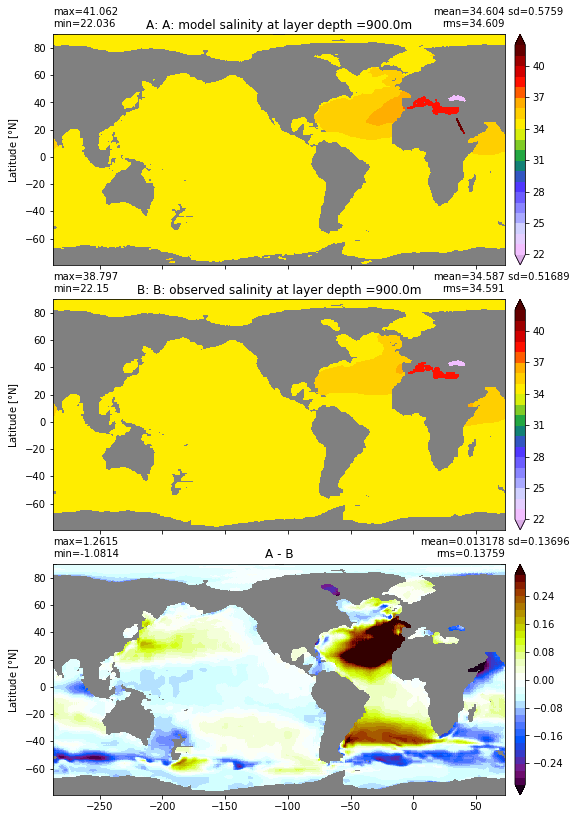

### temp at depth level = 1000.0m

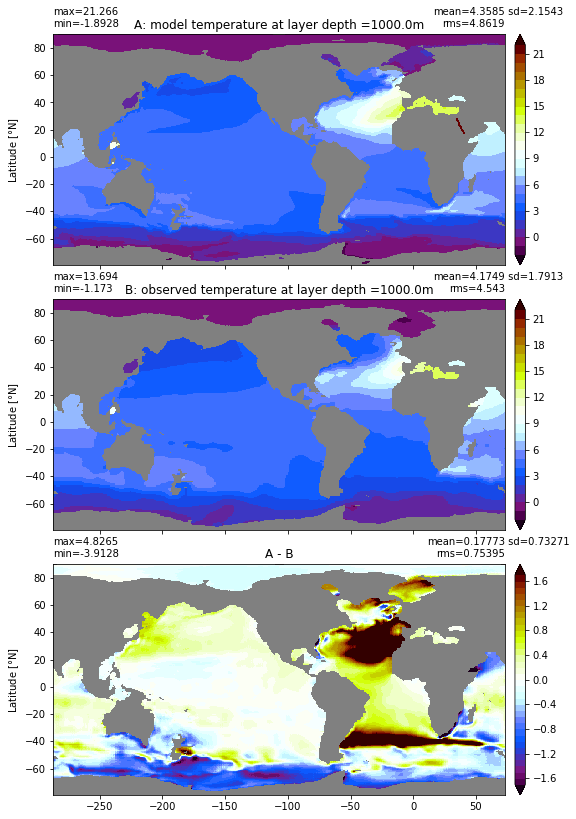

### salt at depth level = 1000.0m

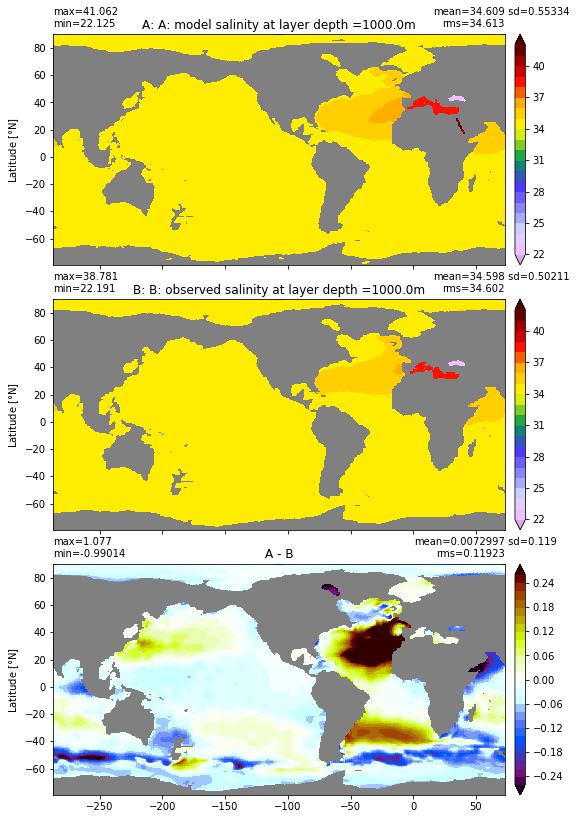

### temp at depth level = 1100.0m

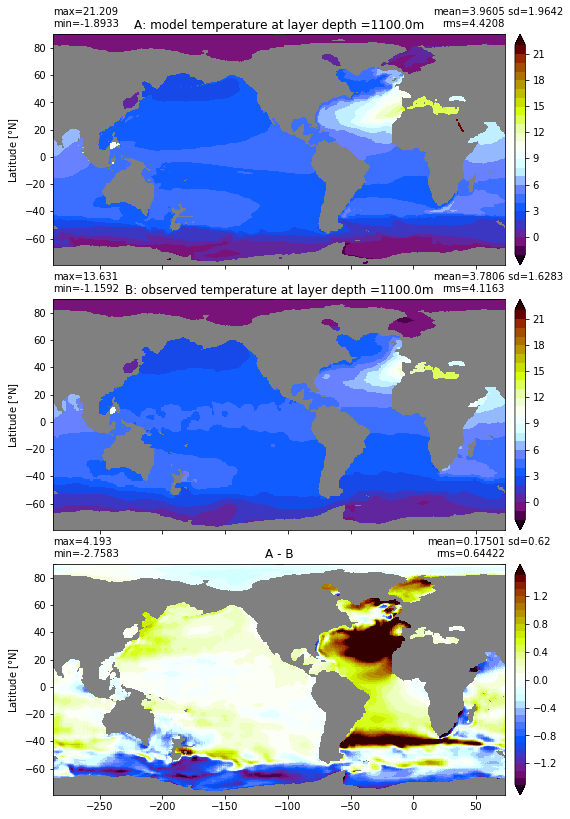

### salt at depth level = 1100.0m

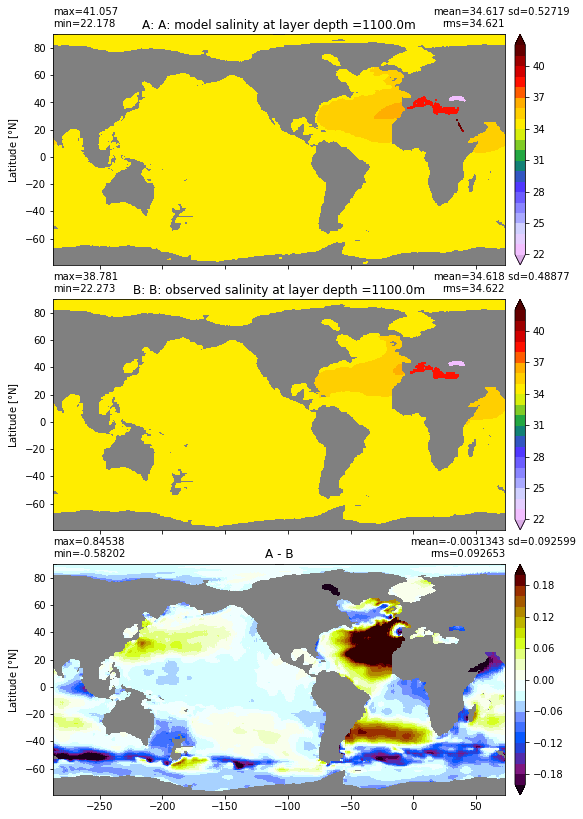

### temp at depth level = 1200.0m

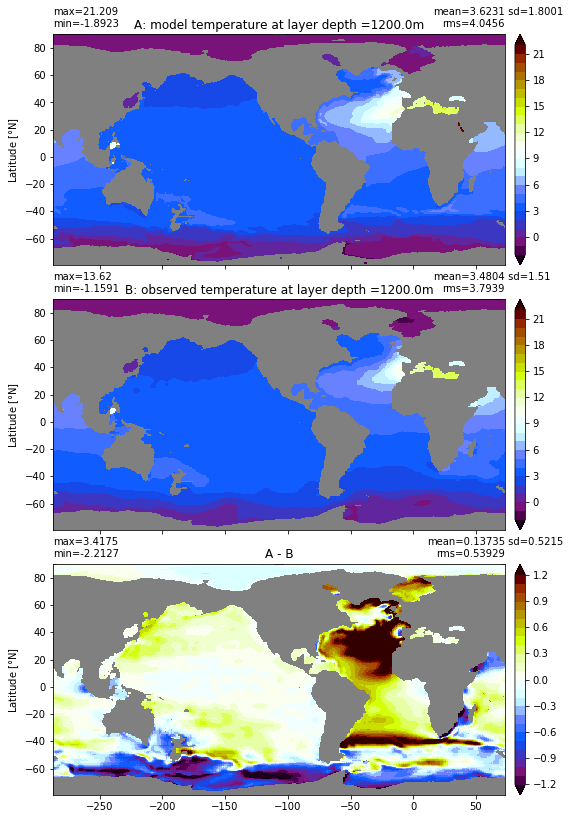

### salt at depth level = 1200.0m

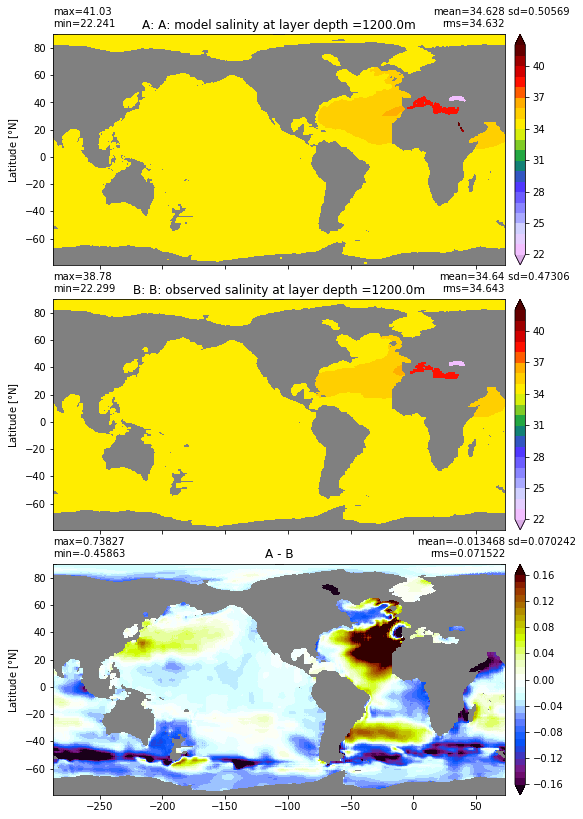

### temp at depth level = 1300.0m

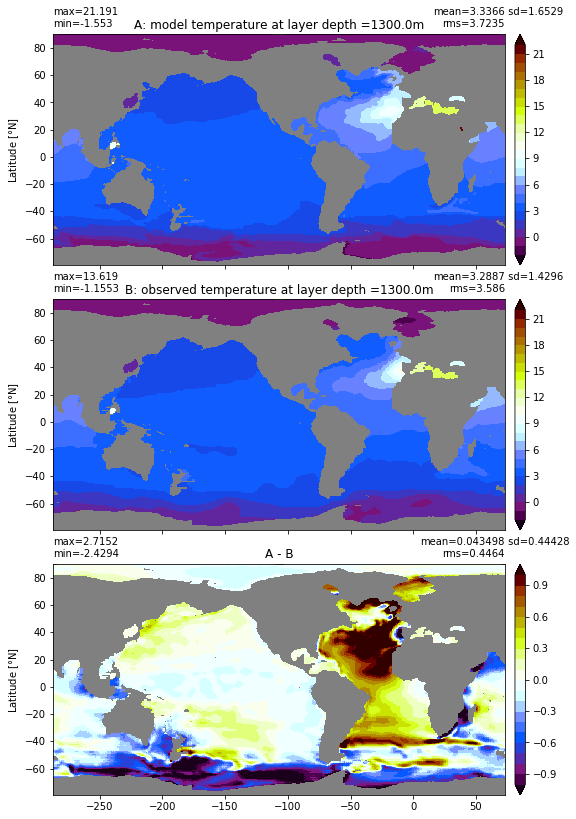

### salt at depth level = 1300.0m

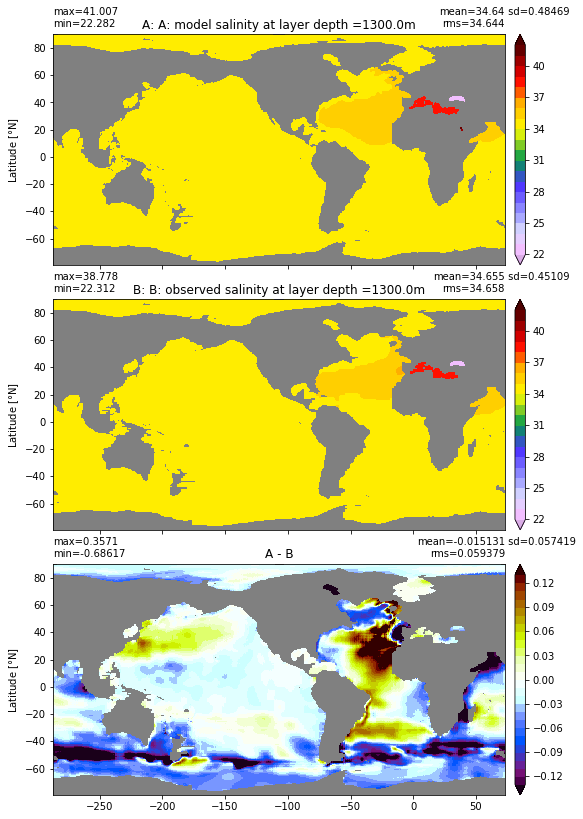

### temp at depth level = 1400.0m

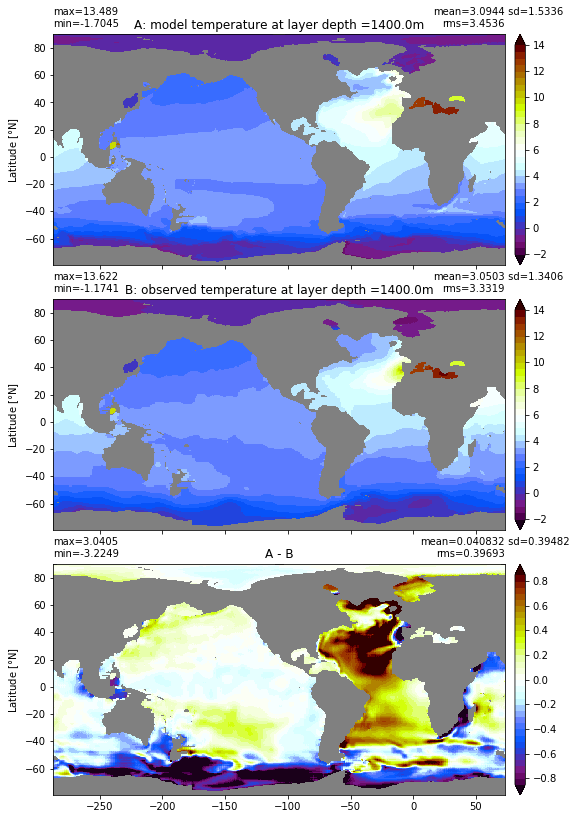

### salt at depth level = 1400.0m

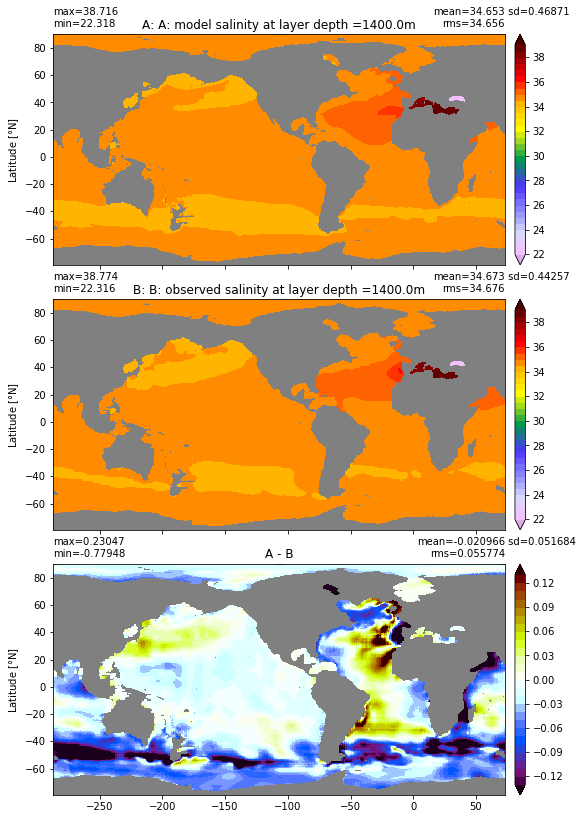

### temp at depth level = 1537.5m

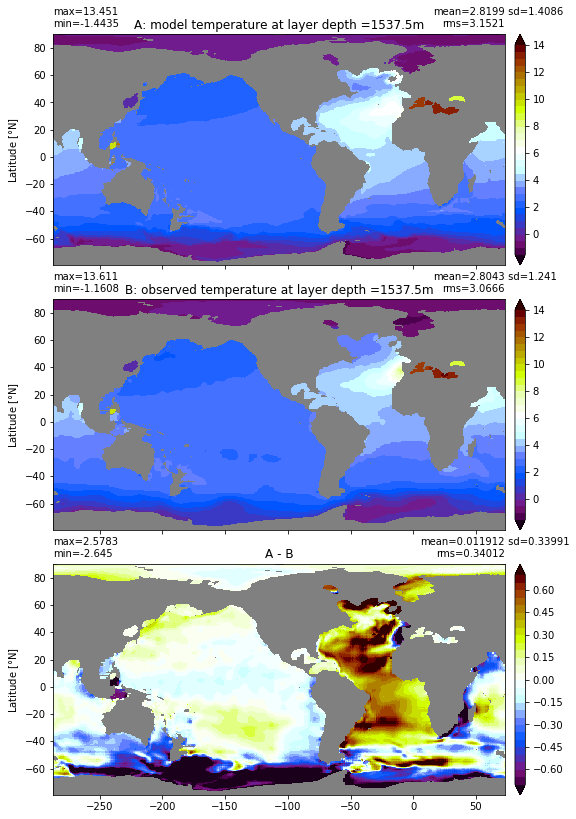

### salt at depth level = 1537.5m

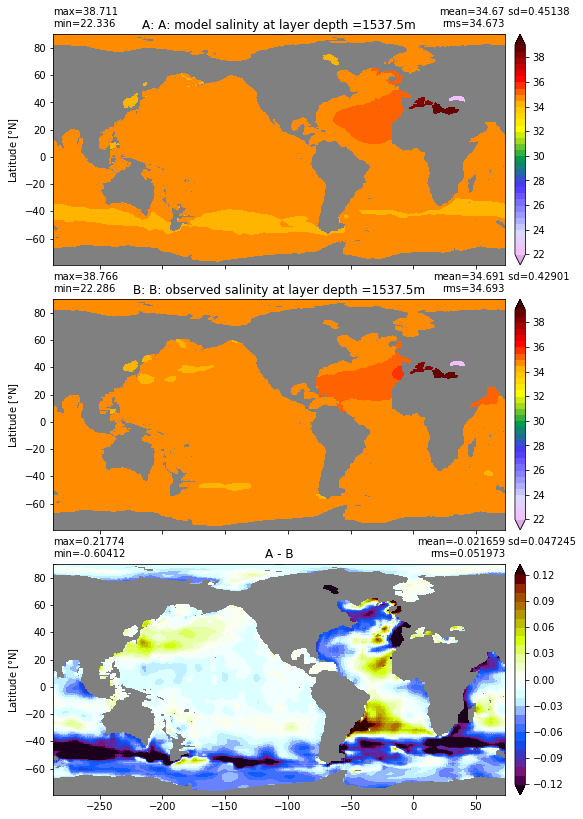

### temp at depth level = 1750.0m

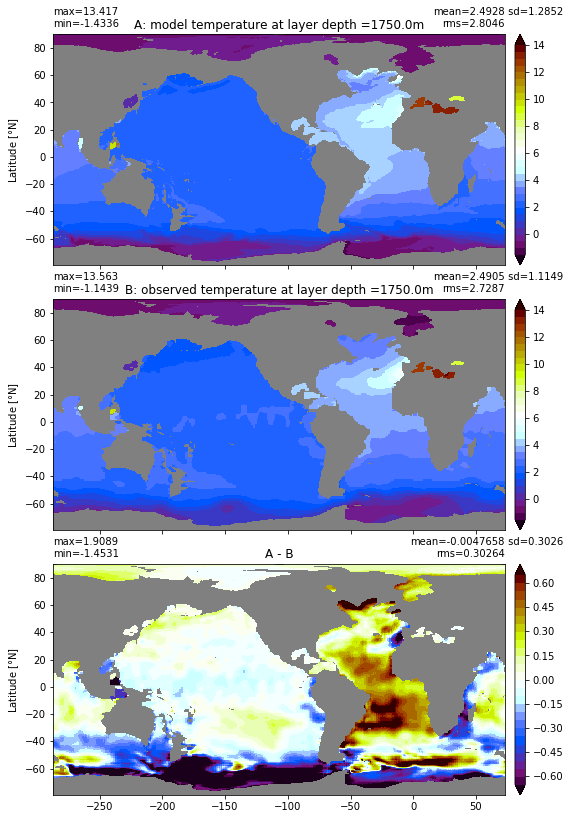

### salt at depth level = 1750.0m

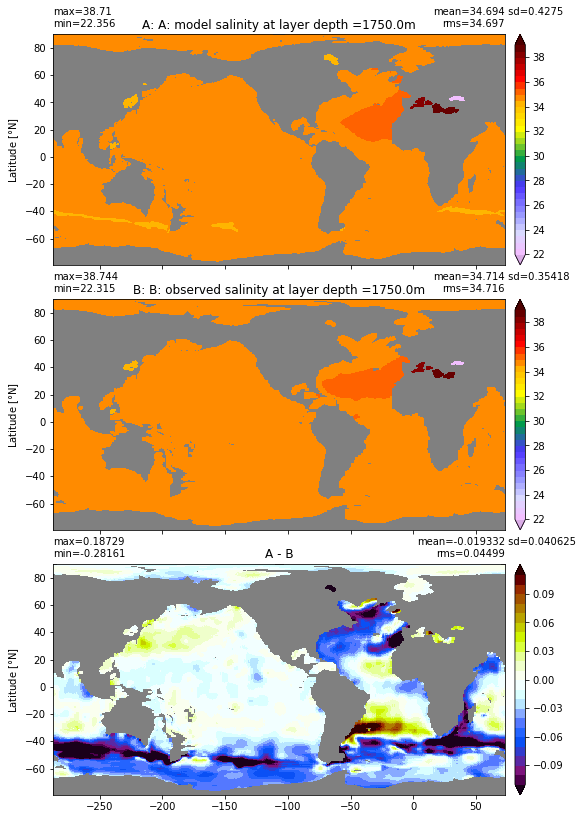

### temp at depth level = 2062.5m

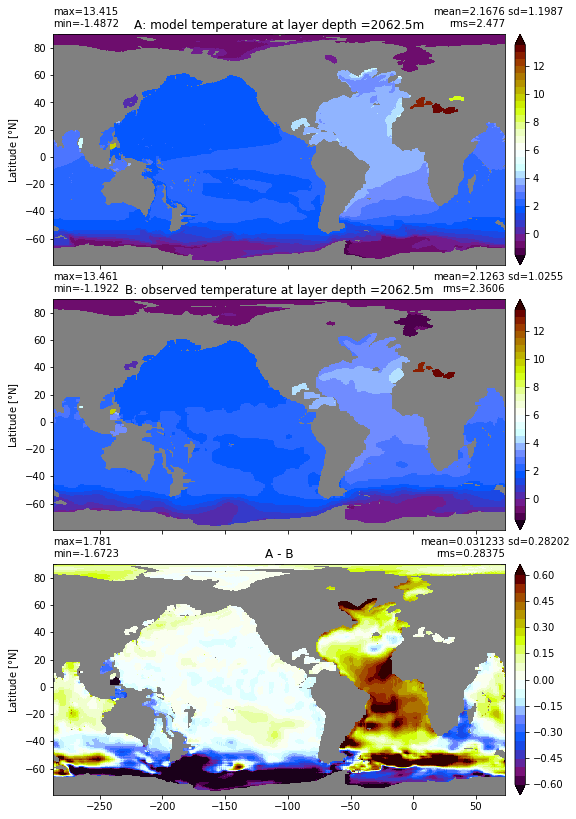

### salt at depth level = 2062.5m

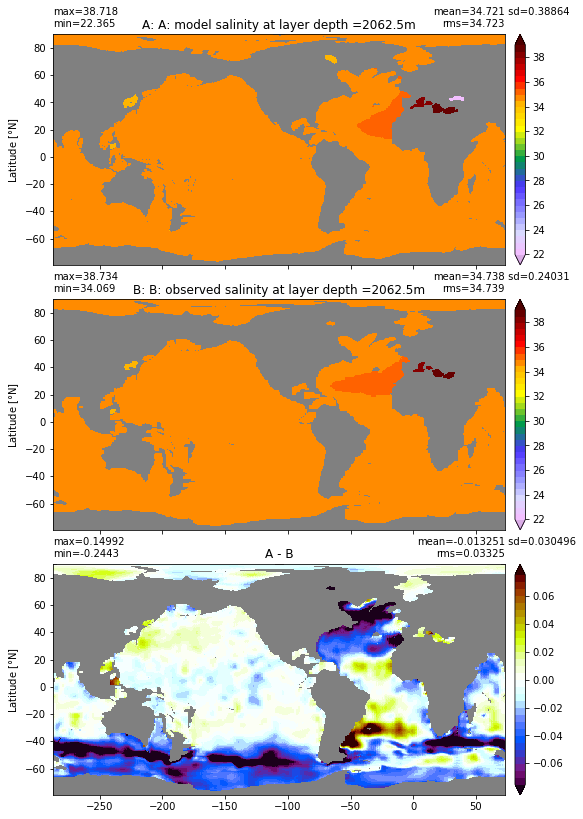

### temp at depth level = 2500.0m

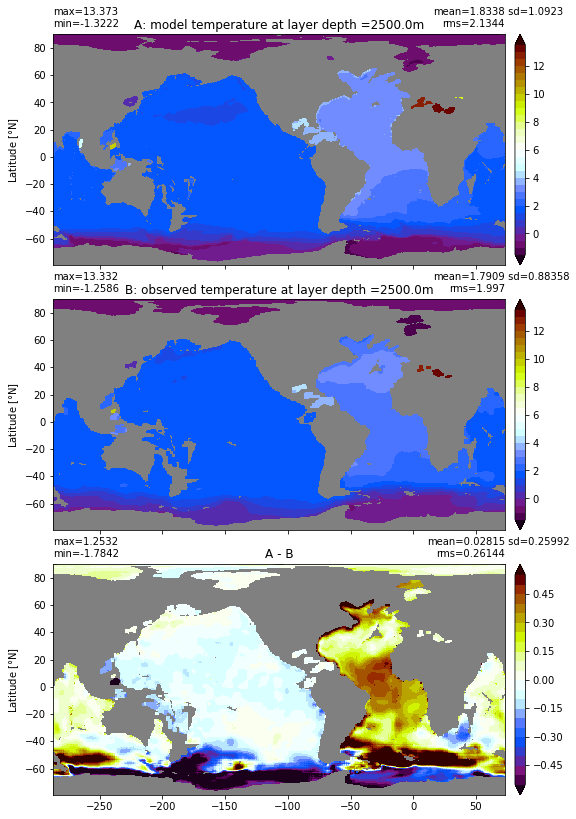

### salt at depth level = 2500.0m

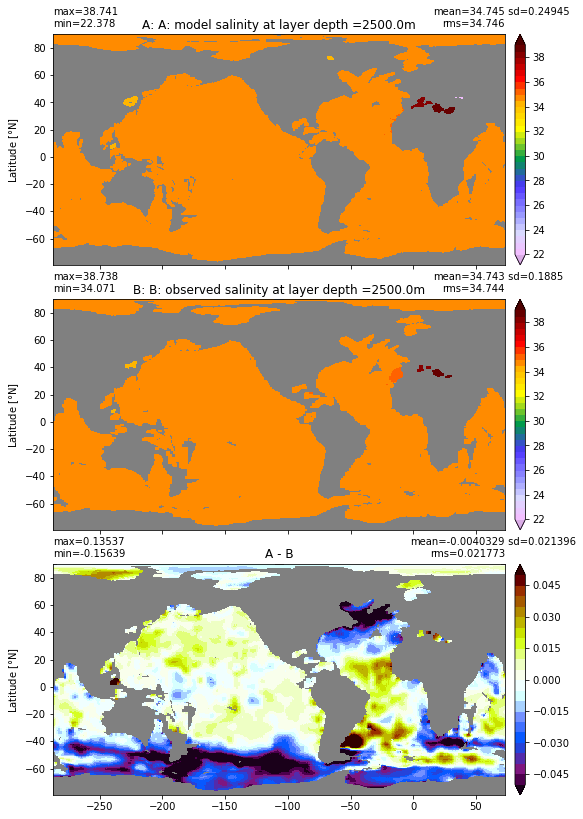

### temp at depth level = 3000.0m

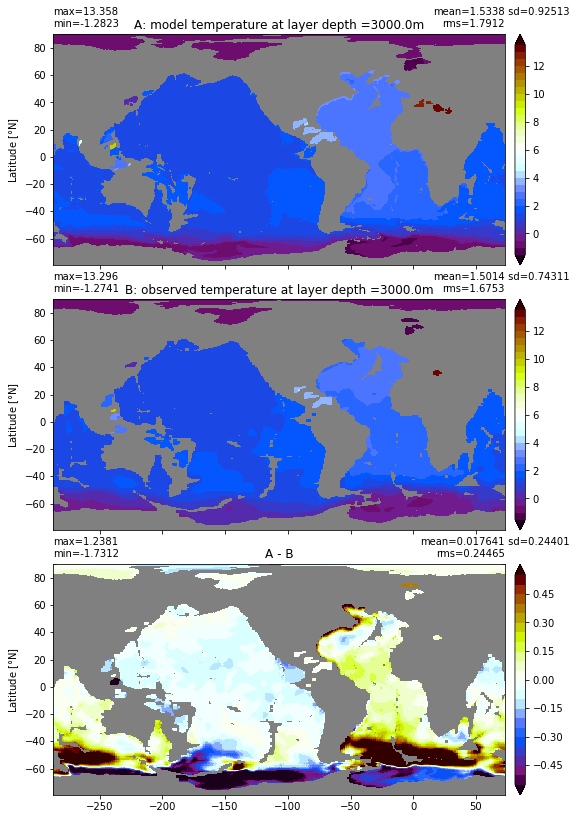

### salt at depth level = 3000.0m

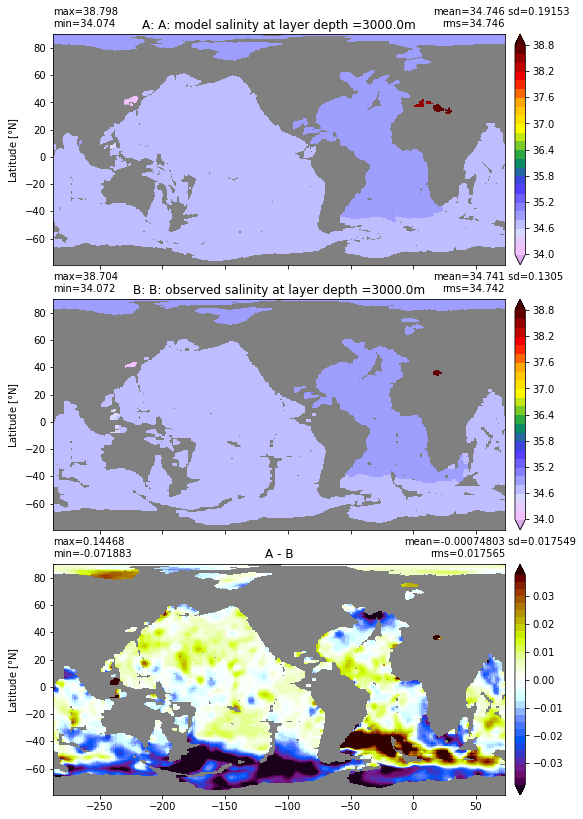

### temp at depth level = 3500.0m

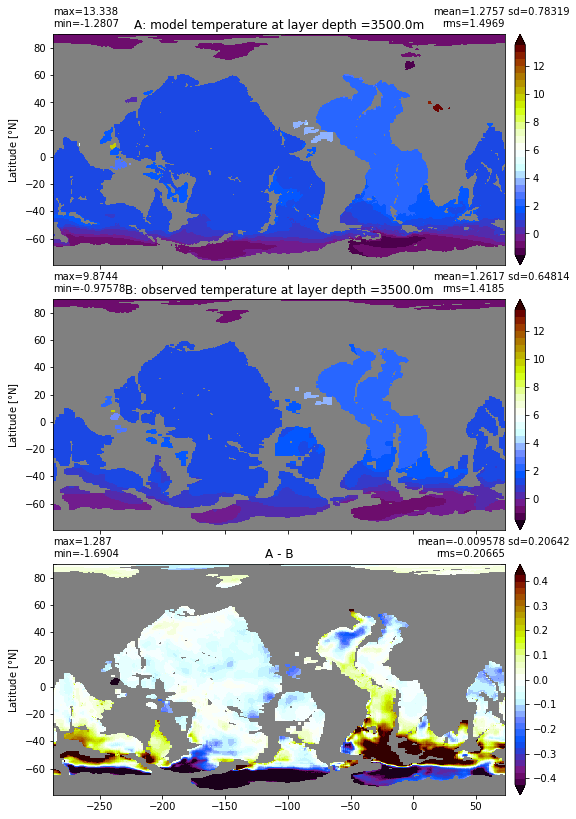

### salt at depth level = 3500.0m

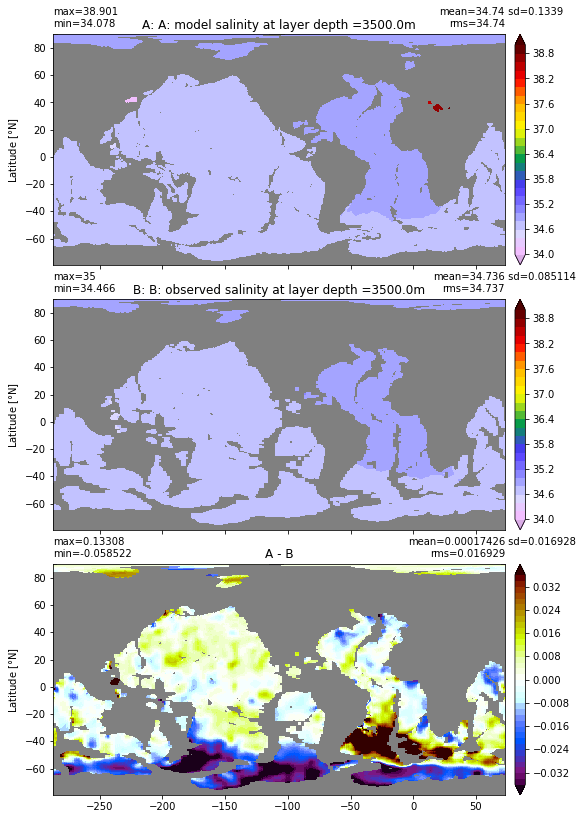

### temp at depth level = 4000.0m

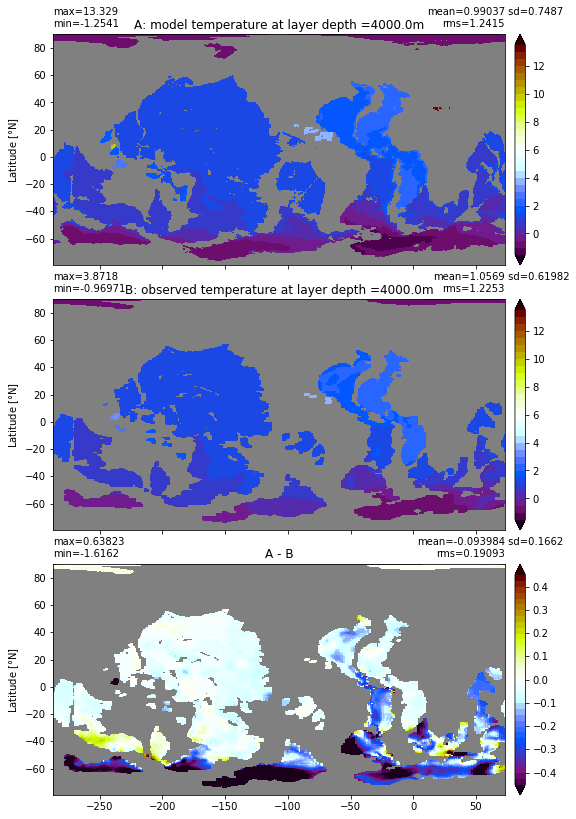

### salt at depth level = 4000.0m

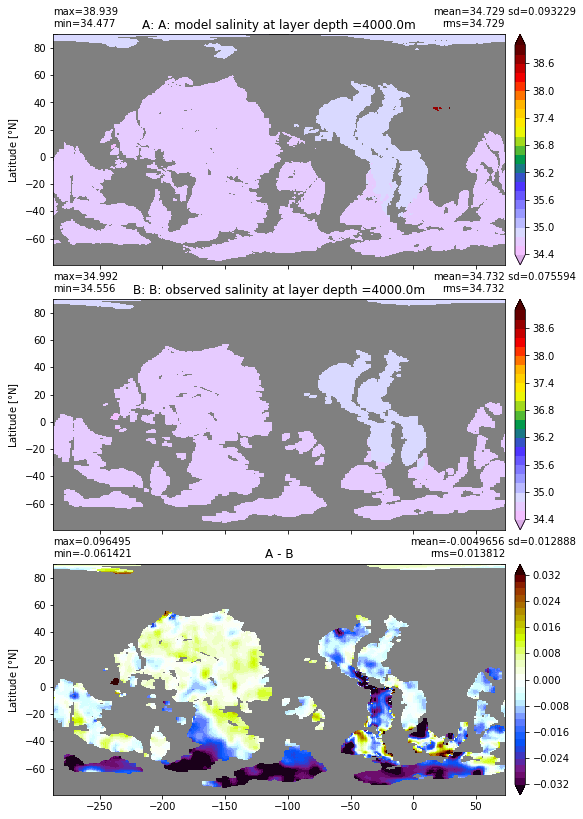

### temp at depth level = 4500.0m

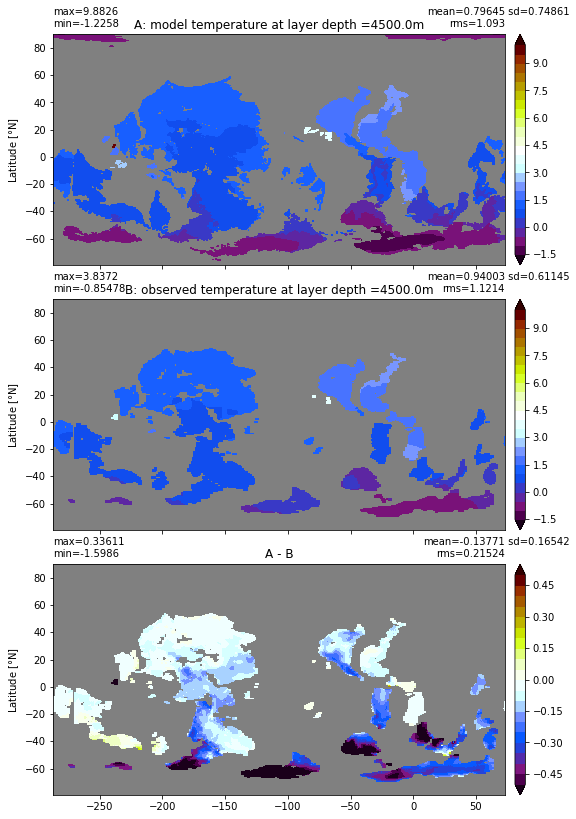

### salt at depth level = 4500.0m

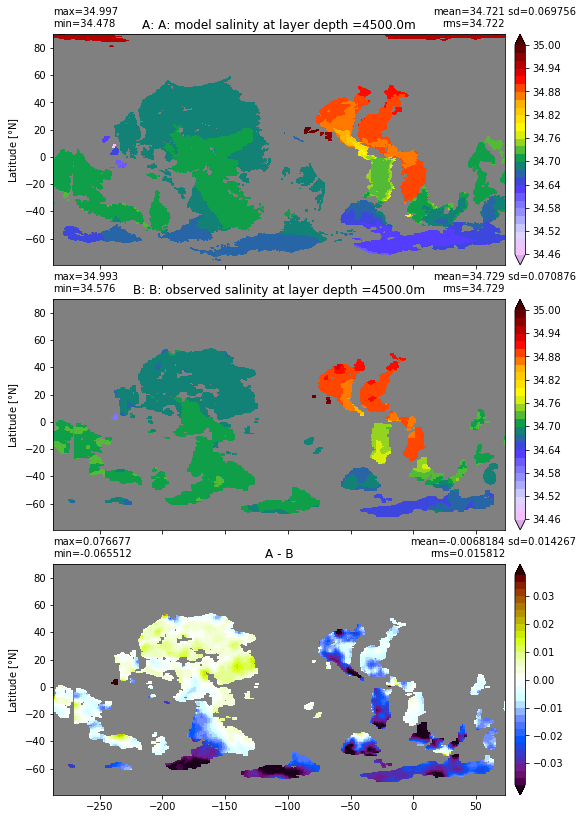

### temp at depth level = 5000.0m

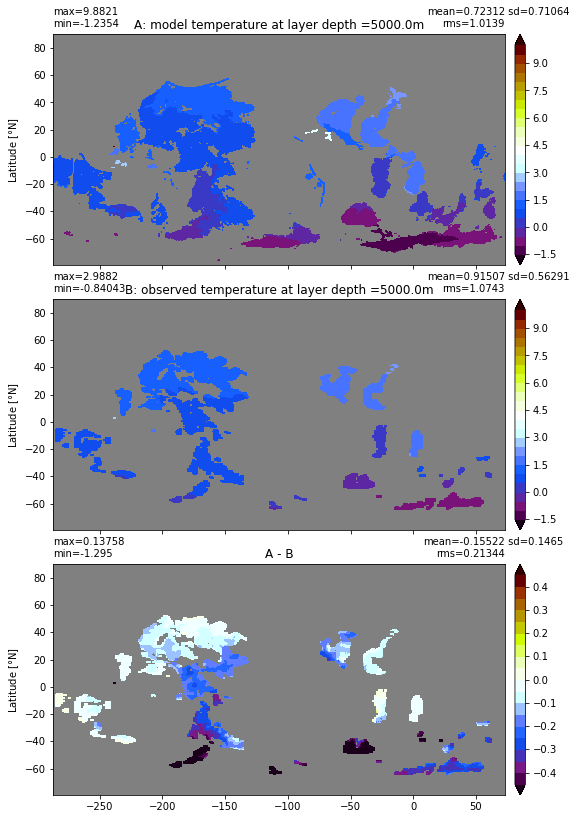

### salt at depth level = 5000.0m

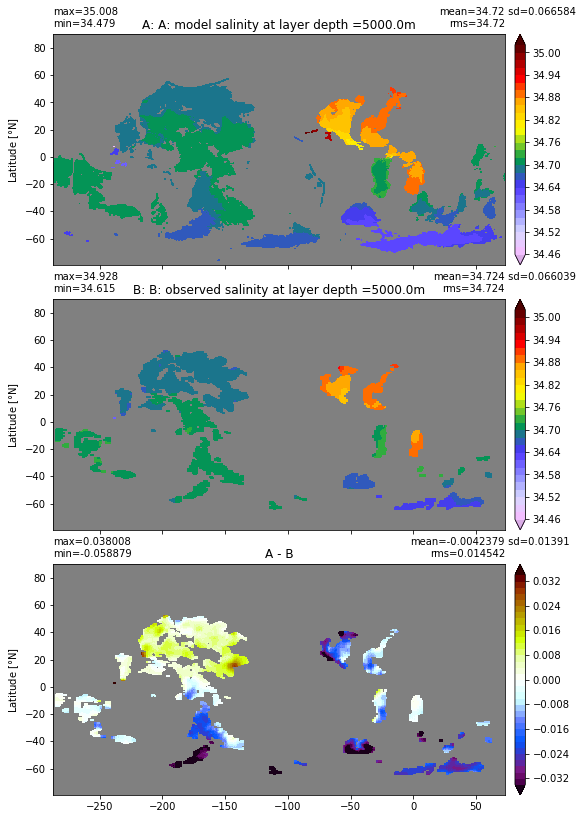

### temp at depth level = 5500.0m

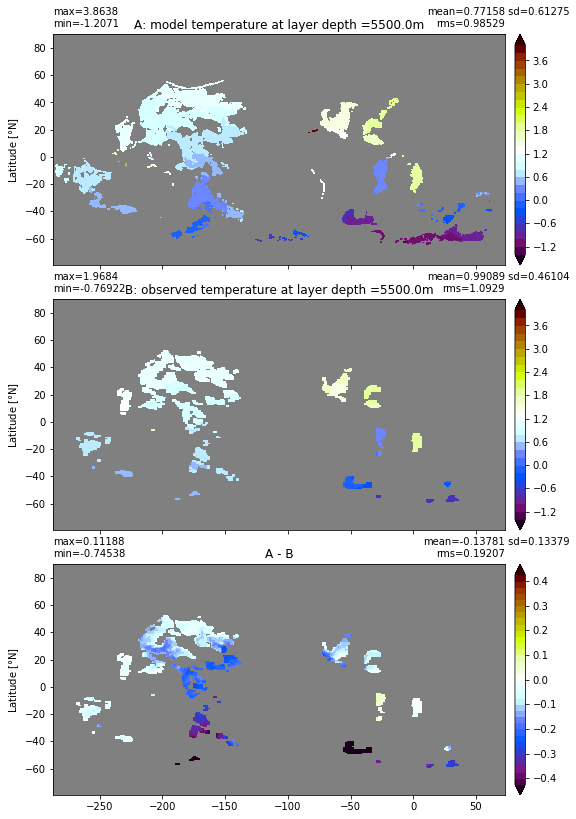

### salt at depth level = 5500.0m

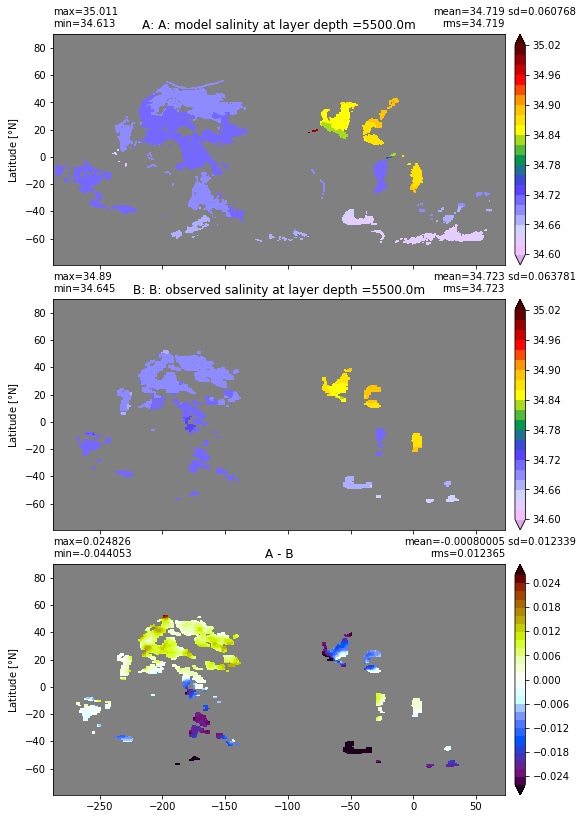

### temp at depth level = 6000.0m

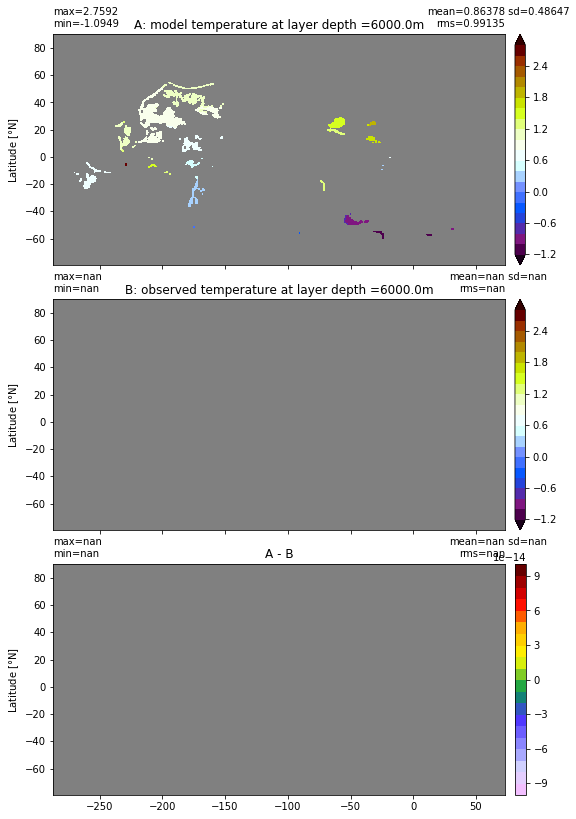

### salt at depth level = 6000.0m

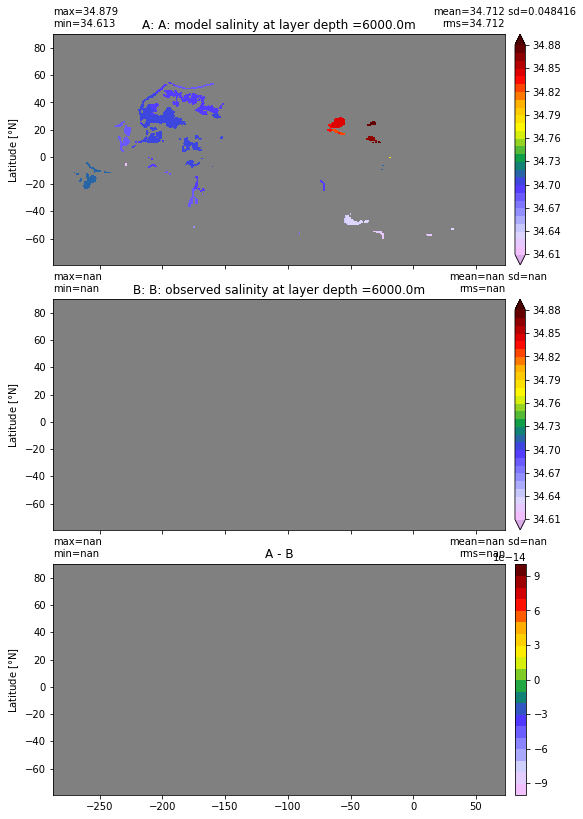

In [33]:
display(Markdown('### Comparing temperature and salinity averaged between years '+str(ti)+' and '+ str(tf)))
# loop over depths and compare TS fields
km = len(phc_temp['depth'])
for k in range(km):
    display(Markdown('### temp at depth level = '+str(out_nc['z_l'][k].values)+ 'm'))
    temp_obs = np.ma.masked_invalid(phc_temp['TEMP'][k,:].values)
    xycompare(temp[k,:] , temp_obs, grd.geolon, grd.geolat, area=grd.area_t,
            title1 = 'model temperature at layer depth ='+str(out_nc['z_l'][k].values)+ 'm',
            title2 = 'observed temperature at layer depth ='+str(phc_temp['depth'][k].values)+ 'm',
            #suptitle=args.case_name,
            extend='both',
            show= True)
    display(Markdown('### salt at depth level = '+str(out_nc['z_l'][k].values)+ 'm'))
    salt_obs = np.ma.masked_invalid(phc_salt['SALT'][k,:].values)
    xycompare( salt[k,:] , salt_obs, grd.geolon, grd.geolat, area=grd.area_t,
            title1 = 'A: model salinity at layer depth ='+str(out_nc['z_l'][k].values)+ 'm',
            title2 = 'B: observed salinity at layer depth ='+str(phc_temp['depth'][k].values)+ 'm',
            #suptitle=args.case_name,
            extend='both',
            show= True)
    

### Polar Temperature and Salinity at Depth Levels